<a href="https://colab.research.google.com/github/Harini25-csm/ADSA/blob/main/DSA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

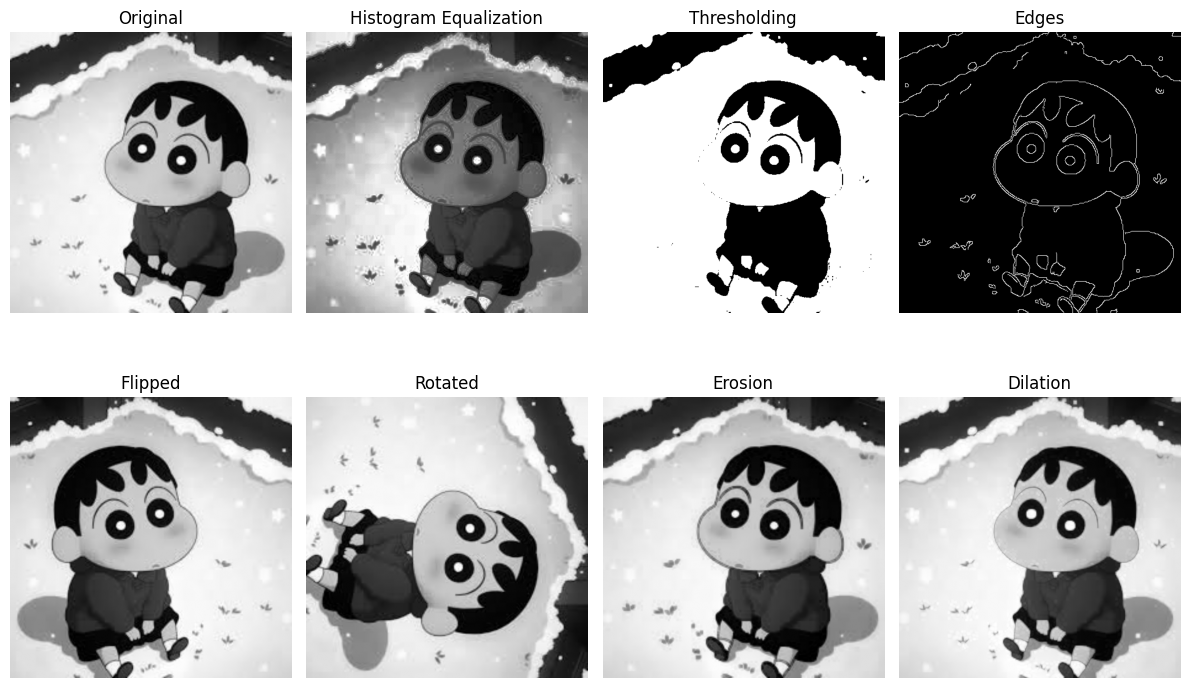

In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Read image in grayscale
img = cv2.imread("/content/image.jpg", 0)

if img is None:
    print("Image not found!")
    exit()

img = cv2.resize(img, (512, 512))

# Image Processing
hist_eq = cv2.equalizeHist(img)
_, thresh = cv2.threshold(img, 127, 255, cv2.THRESH_BINARY)
edges = cv2.Canny(img, 100, 200)

flip = cv2.flip(img, 1)
rotate = cv2.rotate(img, cv2.ROTATE_90_CLOCKWISE)

kernel = np.ones((3,3), np.uint8)
erosion = cv2.erode(img, kernel, iterations=1)
dilation = cv2.dilate(img, kernel, iterations=1)

# Display using matplotlib
titles = [
    "Original", "Histogram Equalization", "Thresholding", "Edges",
    "Flipped", "Rotated", "Erosion", "Dilation"
]

images = [
    img, hist_eq, thresh, edges,
    flip, rotate, erosion, dilation
]

plt.figure(figsize=(12, 8))

for i in range(8):
    plt.subplot(2, 4, i+1)
    plt.imshow(images[i], cmap='gray')
    plt.title(titles[i])
    plt.axis('off')

plt.tight_layout()
plt.show()


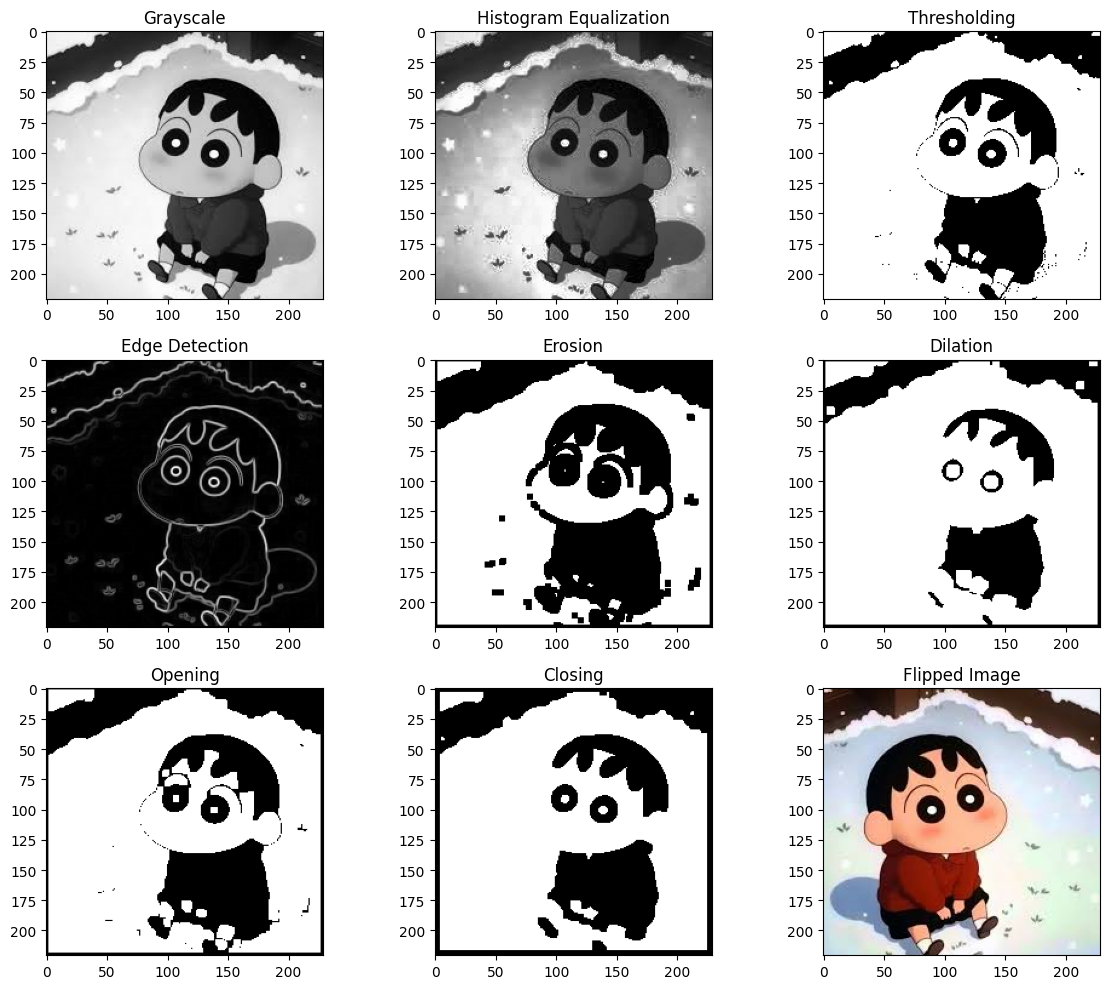

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image

img = np.array(Image.open("/content/image.jpg"))

gray = (0.299*img[:,:,0] + 0.587*img[:,:,1] + 0.114*img[:,:,2]).astype(np.uint8)

hist, bins = np.histogram(gray.flatten(), 256, [0,256])
cdf = hist.cumsum()
cdf = (cdf - cdf.min()) * 255 / (cdf.max() - cdf.min())
hist_eq = cdf[gray].astype(np.uint8)

thresh = np.where(gray > 127, 255, 0).astype(np.uint8)

kx = np.array([[-1,0,1],[-2,0,2],[-1,0,1]])
ky = np.array([[1,2,1],[0,0,0],[-1,-2,-1]])

gx = np.zeros_like(gray, dtype=float)
gy = np.zeros_like(gray, dtype=float)

for i in range(1, gray.shape[0]-1):
    for j in range(1, gray.shape[1]-1):
        region = gray[i-1:i+2, j-1:j+2]
        gx[i,j] = np.sum(region * kx)
        gy[i,j] = np.sum(region * ky)

edges = np.sqrt(gx**2 + gy**2)
edges = (edges / edges.max() * 255).astype(np.uint8)

flip = img[:, ::-1]

h, w = gray.shape
angle = np.radians(30)
cos, sin = np.cos(angle), np.sin(angle)
cx, cy = w//2, h//2
rotated = np.zeros_like(img)

for i in range(h):
    for j in range(w):
        x = int(cos*(j-cx) - sin*(i-cy) + cx)
        y = int(sin*(j-cx) + cos*(i-cy) + cy)
        if 0 <= y < h and 0 <= x < w:
            rotated[i,j] = img[y,x]

scaled = img[::2, ::2]

kernel = np.ones((5,5), dtype=np.uint8)

def erode(img):
    out = np.zeros_like(img)
    for i in range(2, img.shape[0]-2):
        for j in range(2, img.shape[1]-2):
            out[i,j] = np.min(img[i-2:i+3, j-2:j+3])
    return out

def dilate(img):
    out = np.zeros_like(img)
    for i in range(2, img.shape[0]-2):
        for j in range(2, img.shape[1]-2):
            out[i,j] = np.max(img[i-2:i+3, j-2:j+3])
    return out

erosion = erode(thresh)
dilation = dilate(thresh)
opening = dilate(erosion)
closing = erode(dilation)

plt.figure(figsize=(12,10))

plt.subplot(3,3,1)
plt.imshow(gray, cmap='gray')
plt.title("Grayscale")

plt.subplot(3,3,2)
plt.imshow(hist_eq, cmap='gray')
plt.title("Histogram Equalization")

plt.subplot(3,3,3)
plt.imshow(thresh, cmap='gray')
plt.title("Thresholding")

plt.subplot(3,3,4)
plt.imshow(edges, cmap='gray')
plt.title("Edge Detection")

plt.subplot(3,3,5)
plt.imshow(erosion, cmap='gray')
plt.title("Erosion")

plt.subplot(3,3,6)
plt.imshow(dilation, cmap='gray')
plt.title("Dilation")

plt.subplot(3,3,7)
plt.imshow(opening, cmap='gray')
plt.title("Opening")

plt.subplot(3,3,8)
plt.imshow(closing, cmap='gray')
plt.title("Closing")

plt.subplot(3,3,9)
plt.imshow(flip)
plt.title("Flipped Image")

plt.tight_layout()
plt.show()

In [ ]:
import numpy as np
import pandas as pd

url = "https://raw.githubusercontent.com/jbrownlee/Datasets/master/iris.csv"
columns = ["sepal_length", "sepal_width", "petal_length", "petal_width", "class"]

data = pd.read_csv(url, header=None, names=columns)

# Remove Iris-virginica
data = data[data['class'] != 'Iris-virginica']

# Map classes
data['class'] = data['class'].map({
    'Iris-setosa': 0,
    'Iris-versicolor': 1
})

X = data.iloc[:, 0:3].values
y = data['class'].values

learning_rate = 0.1
epochs = 10
weights = np.zeros(X.shape[1])
bias = 0

def step_function(z):
    return 1 if z >= 0 else 0

for epoch in range(epochs):
    for i in range(len(X)):
        z = np.dot(X[i], weights) + bias
        y_pred = step_function(z)
        error = y[i] - y_pred

        weights += learning_rate * error * X[i]
        bias += learning_rate * error

    print(f"Epoch {epoch+1}: Weights={weights}, Bias={bias}")

# Accuracy
correct = 0
for i in range(len(X)):
    z = np.dot(X[i], weights) + bias
    y_pred = step_function(z)
    if y_pred == y[i]:
        correct += 1

accuracy = correct / len(X)
print("\nFinal Accuracy:", accuracy)


Epoch 1: Weights=[ 0.19 -0.03  0.33], Bias=0.0
Epoch 2: Weights=[ 0.38 -0.06  0.66], Bias=0.0
Epoch 3: Weights=[ 0.36 -0.17  0.85], Bias=0.0
Epoch 4: Weights=[ 0.36 -0.27  1.01], Bias=0.0
Epoch 5: Weights=[-0.15 -0.62  0.87], Bias=-0.1
Epoch 6: Weights=[-0.15 -0.62  0.87], Bias=-0.1
Epoch 7: Weights=[-0.15 -0.62  0.87], Bias=-0.1
Epoch 8: Weights=[-0.15 -0.62  0.87], Bias=-0.1
Epoch 9: Weights=[-0.15 -0.62  0.87], Bias=-0.1
Epoch 10: Weights=[-0.15 -0.62  0.87], Bias=-0.1

Final Accuracy: 1.0


In [ ]:
import numpy as np

# Input values
x = np.linspace(-10, 10, 10)

# Activation functions
def step(z):
    return np.where(z >= 0, 1, 0)

def sigmoid(z):
    return 1 / (1 + np.exp(-z))

def tanh(z):
    return np.tanh(z)

def relu(z):
    return np.maximum(0, z)

def leaky_relu(z, alpha=0.01):
    return np.where(z > 0, z, alpha * z)

def softmax(z):
    exp_z = np.exp(z)
    return exp_z / np.sum(exp_z)

# Outputs
print("Input:", x)
print("Step:", step(x))
print("Sigmoid:", sigmoid(x))
print("Tanh:", tanh(x))
print("ReLU:", relu(x))
print("Leaky ReLU:", leaky_relu(x))
print("Softmax:", softmax(x))


Input: [-10.          -7.77777778  -5.55555556  -3.33333333  -1.11111111
   1.11111111   3.33333333   5.55555556   7.77777778  10.        ]
Step: [0 0 0 0 0 1 1 1 1 1]
Sigmoid: [4.53978687e-05 4.18766684e-04 3.85103236e-03 3.44451957e-02
 2.47663801e-01 7.52336199e-01 9.65554804e-01 9.96148968e-01
 9.99581233e-01 9.99954602e-01]
Tanh: [-1.         -0.99999965 -0.99997011 -0.99745797 -0.8044548   0.8044548
  0.99745797  0.99997011  0.99999965  1.        ]
ReLU: [ 0.          0.          0.          0.          0.          1.11111111
  3.33333333  5.55555556  7.77777778 10.        ]
Leaky ReLU: [-0.1        -0.07777778 -0.05555556 -0.03333333 -0.01111111  1.11111111
  3.33333333  5.55555556  7.77777778 10.        ]
Softmax: [1.83779048e-09 1.69587894e-08 1.56492560e-07 1.44408429e-06
 1.33257417e-05 1.22967471e-04 1.13472099e-03 1.04709947e-02
 9.66243948e-02 8.91631977e-01]


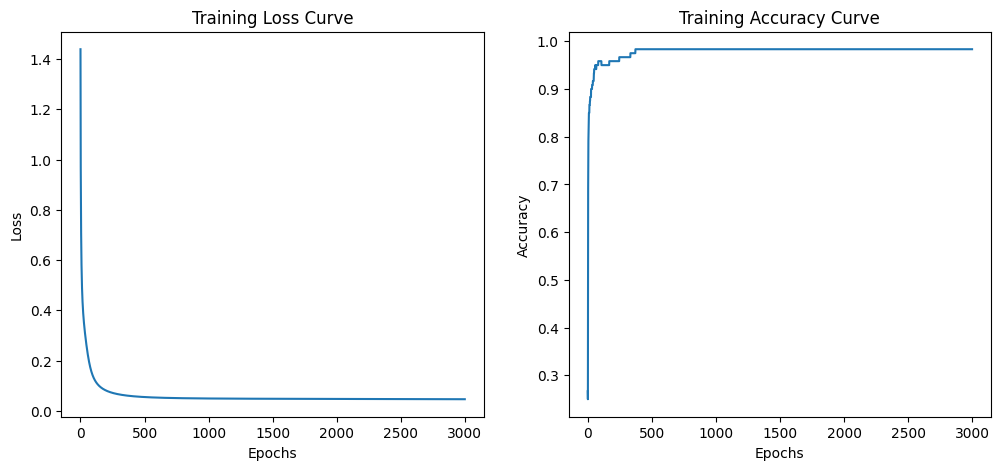

Test Accuracy: 1.0


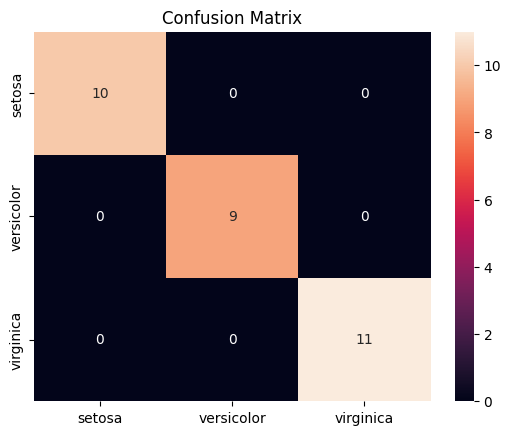

              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        10
  versicolor       1.00      1.00      1.00         9
   virginica       1.00      1.00      1.00        11

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30

Sample 1: Predicted = versicolor, Actual = versicolor
Sample 2: Predicted = setosa, Actual = setosa
Sample 3: Predicted = virginica, Actual = virginica
Sample 4: Predicted = versicolor, Actual = versicolor
Sample 5: Predicted = versicolor, Actual = versicolor


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns
# Load dataset
iris = load_iris()
X = iris.data
y = iris.target.reshape(-1, 1)
class_names = iris.target_names
# One-hot encoding
y = pd.get_dummies(y.flatten()).values
# Feature scaling
scaler = StandardScaler()
X = scaler.fit_transform(X)
# Train-test split
X_train, X_test, y_train, y_test = train_test_split(
 X, y, test_size=0.2, random_state=42
)
# Network parameters
input_size = 4
hidden_size = 6
output_size = 3
learning_rate = 0.01
epochs = 3000
# Initialize weights and biases
np.random.seed(10)
W1 = np.random.randn(input_size, hidden_size)
b1 = np.zeros((1, hidden_size))
W2 = np.random.randn(hidden_size, output_size)
b2 = np.zeros((1, output_size))
# Activation functions
def sigmoid(x):
 return 1 / (1 + np.exp(-x))
def sigmoid_derivative(a):
 return a * (1 - a)
def softmax(x):
 exp_x = np.exp(x - np.max(x, axis=1, keepdims=True))
 return exp_x / np.sum(exp_x, axis=1, keepdims=True)
def cross_entropy(y_true, y_pred):
 return -np.mean(np.sum(y_true * np.log(y_pred + 1e-9), axis=1))
loss_history = []
accuracy_history = []
# Training
for epoch in range(epochs):
 Z1 = np.dot(X_train, W1) + b1
 A1 = sigmoid(Z1)
 Z2 = np.dot(A1, W2) + b2
 A2 = softmax(Z2)
 loss = cross_entropy(y_train, A2)
 predictions = np.argmax(A2, axis=1)
 true_labels = np.argmax(y_train, axis=1)
 accuracy = np.mean(predictions == true_labels)
 loss_history.append(loss)
 accuracy_history.append(accuracy)
 error = A2 - y_train
 dW2 = np.dot(A1.T, error)
 db2 = np.sum(error, axis=0, keepdims=True)
 d_hidden = np.dot(error, W2.T) * sigmoid_derivative(A1)
 dW1 = np.dot(X_train.T, d_hidden)
 db1 = np.sum(d_hidden, axis=0, keepdims=True)
 W2 -= learning_rate * dW2
 b2 -= learning_rate * db2
 W1 -= learning_rate * dW1
 b1 -= learning_rate * db1
# Learning curves
plt.figure(figsize=(12,5))
plt.subplot(1,2,1)
plt.plot(loss_history)
plt.title("Training Loss Curve")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.subplot(1,2,2)
plt.plot(accuracy_history)
plt.title("Training Accuracy Curve")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.show()
# Testing
Z1 = np.dot(X_test, W1) + b1
A1 = sigmoid(Z1)
Z2 = np.dot(A1, W2) + b2
A2 = softmax(Z2)
test_predictions = np.argmax(A2, axis=1)
test_true = np.argmax(y_test, axis=1)
print("Test Accuracy:", np.mean(test_predictions == test_true))
# Confusion Matrix
cm = confusion_matrix(test_true, test_predictions)
sns.heatmap(cm, annot=True, fmt="d",
 xticklabels=class_names,
 yticklabels=class_names)
plt.title("Confusion Matrix")
plt.show()
# Classification Report
print(classification_report(test_true, test_predictions,
 target_names=class_names))
# Inference examples
for i in range(5):
 print(f"Sample {i+1}: Predicted = {class_names[test_predictions[i]]}, "
 f"Actual = {class_names[test_true[i]]}")

17464789/17464789 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step

Training GRU Model

Epoch 1/3


/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/embedding.py:97: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 531ms/step - accuracy: 0.6917 - loss: 0.5483Epoch 1: Loss=0.4551, Accuracy=0.7779, Val_Loss=0.3696, Val_Accuracy=0.8316
313/313 ━━━━━━━━━━━━━━━━━━━━ 178s 560ms/step - accuracy: 0.6920 - loss: 0.5480 - val_accuracy: 0.8316 - val_loss: 0.3696
Epoch 2/3
313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 473ms/step - accuracy: 0.8895 - loss: 0.2693Epoch 2: Loss=0.2981, Accuracy=0.8755, Val_Loss=0.3353, Val_Accuracy=0.8570
313/313 ━━━━━━━━━━━━━━━━━━━━ 159s 506ms/step - accuracy: 0.8895 - loss: 0.2694 - val_accuracy: 0.8570 - val_loss: 0.3353
Epoch 3/3
313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 467ms/step - accuracy: 0.9283 - loss: 0.1885Epoch 3: Loss=0.1985, Accuracy=0.9240, Val_Loss=0.3526, Val_Accuracy=0.8660
313/313 ━━━━━━━━━━━━━━━━━━━━ 167s 533ms/step - accuracy: 0.9283 - loss: 0.1886 - val_accuracy: 0.8660 - val_loss: 0.3526

Training LSTM Model

Epoch 1/3
313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 469ms/step - accuracy: 0.6746 - loss: 0.5645Epoch 1: Loss=0.4595, Accuracy=0.7712, Val_Loss=0.367

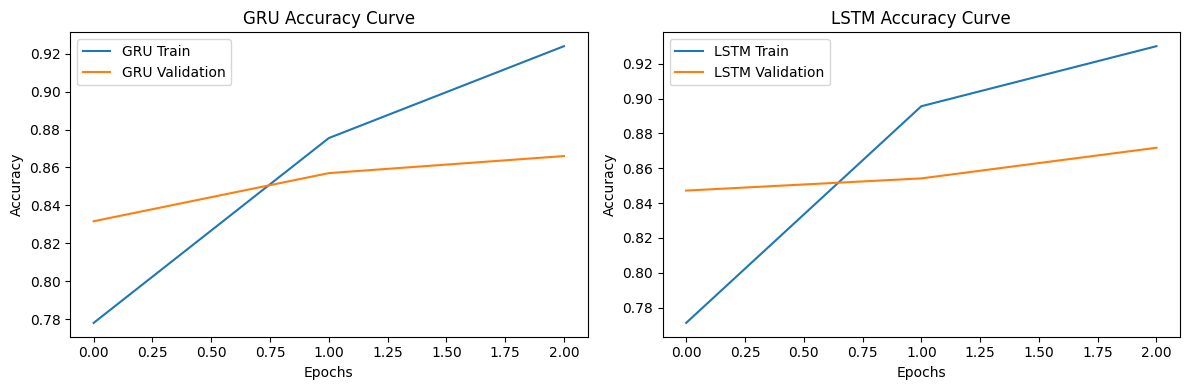


Test Accuracy Results
GRU Test Accuracy : 0.8518400192260742
LSTM Test Accuracy: 0.8650799989700317
1641221/1641221 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step

Inference on Test Samples

Review 1:
<PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD>
Actual Sentiment : Negative
GRU Prediction  : Negative (0.22)
LSTM Prediction : Negative (0.07)
--------------------------------------------------------------------------------
Review 2:
psychological <UNK> it's very interesting that robert altman directed this considering the style and structure of his other films still the trademark altman audio style is evident here and there i think what really makes this film work is the
Actual Sentiment : Positive
GRU Prediction  : Positive (1.00)
LSTM Prediction : Positive (1.00)
----------------------------------------------

In [ ]:
# -----------------------------------------------------------
# Step 1: Import Libraries and Load Dataset
# -----------------------------------------------------------
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.datasets import imdb
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, GRU, LSTM, Dense
from tensorflow.keras.callbacks import Callback

# Dataset parameters
vocab_size = 10000
max_len = 200

# Load IMDB dataset
(X_train, y_train), (X_test, y_test) = imdb.load_data(num_words=vocab_size)

# Pad sequences to fixed length
X_train = pad_sequences(X_train, maxlen=max_len)
X_test = pad_sequences(X_test, maxlen=max_len)

# -----------------------------------------------------------
# Step 2: Training Progress Callback
# -----------------------------------------------------------
class TrainingProgress(Callback):
    def on_epoch_end(self, epoch, logs=None):
        print(
            f"Epoch {epoch+1}: "
            f"Loss={logs['loss']:.4f}, "
            f"Accuracy={logs['accuracy']:.4f}, "
            f"Val_Loss={logs['val_loss']:.4f}, "
            f"Val_Accuracy={logs['val_accuracy']:.4f}"
        )

# -----------------------------------------------------------
# Step 3: GRU-Based Model
# -----------------------------------------------------------
gru_model = Sequential([
    Embedding(vocab_size, 128, input_length=max_len),
    GRU(128),
    Dense(1, activation='sigmoid')
])

gru_model.compile(
    optimizer='adam',
    loss='binary_crossentropy',
    metrics=['accuracy']
)

print("\nTraining GRU Model\n")
gru_history = gru_model.fit(
    X_train, y_train,
    epochs=3,
    batch_size=64,
    validation_split=0.2,
    callbacks=[TrainingProgress()]
)

# -----------------------------------------------------------
# Step 4: LSTM-Based Model
# -----------------------------------------------------------
lstm_model = Sequential([
    Embedding(vocab_size, 128, input_length=max_len),
    LSTM(128),
    Dense(1, activation='sigmoid')
])

lstm_model.compile(
    optimizer='adam',
    loss='binary_crossentropy',
    metrics=['accuracy']
)

print("\nTraining LSTM Model\n")
lstm_history = lstm_model.fit(
    X_train, y_train,
    epochs=3,
    batch_size=64,
    validation_split=0.2,
    callbacks=[TrainingProgress()]
)

# -----------------------------------------------------------
# Step 5: Training Progress & Learning Curves
# -----------------------------------------------------------
plt.figure(figsize=(12, 4))

plt.subplot(1, 2, 1)
plt.plot(gru_history.history['accuracy'], label='GRU Train')
plt.plot(gru_history.history['val_accuracy'], label='GRU Validation')
plt.title("GRU Accuracy Curve")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(lstm_history.history['accuracy'], label='LSTM Train')
plt.plot(lstm_history.history['val_accuracy'], label='LSTM Validation')
plt.title("LSTM Accuracy Curve")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()

plt.tight_layout()
plt.show()

# -----------------------------------------------------------
# Step 6: Model Evaluation
# -----------------------------------------------------------
gru_loss, gru_acc = gru_model.evaluate(X_test, y_test, verbose=0)
lstm_loss, lstm_acc = lstm_model.evaluate(X_test, y_test, verbose=0)

print("\nTest Accuracy Results")
print("GRU Test Accuracy :", gru_acc)
print("LSTM Test Accuracy:", lstm_acc)

# -----------------------------------------------------------
# Step 7: Inference Examples
# -----------------------------------------------------------
word_index = imdb.get_word_index()
reverse_word_index = {v + 3: k for k, v in word_index.items()}
reverse_word_index[0] = "<PAD>"
reverse_word_index[1] = "<START>"
reverse_word_index[2] = "<UNK>"

def decode_review(sequence):
    return " ".join([reverse_word_index.get(i, "?") for i in sequence])

print("\nInference on Test Samples\n")

for i in range(3):
    review = X_test[i]
    actual = y_test[i]

    gru_pred = gru_model.predict(review.reshape(1, -1), verbose=0)[0][0]
    lstm_pred = lstm_model.predict(review.reshape(1, -1), verbose=0)[0][0]

    print(f"Review {i+1}:")
    print(decode_review(review[:40]))
    print(f"Actual Sentiment : {'Positive' if actual == 1 else 'Negative'}")
    print(f"GRU Prediction  : {'Positive' if gru_pred > 0.5 else 'Negative'} ({gru_pred:.2f})")
    print(f"LSTM Prediction : {'Positive' if lstm_pred > 0.5 else 'Negative'} ({lstm_pred:.2f})")
    print("-" * 80)


2110848/2110848 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
Number of classes: 46


/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/embedding.py:97: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding (Embedding)           │ (None, 200, 128)       │     1,280,000 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 25600)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │     3,276,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 46)             │         2,990 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 4,568,174 (17.43 MB)

 Trainable params: 4,568,174 (17.43 MB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/10
113/113 ━━━━━━━━━━━━━━━━━━━━ 12s 92ms/step - accuracy: 0.4136 - loss: 2.3794 - val_accuracy: 0.5760 - val_loss: 1.6483
Epoch 2/10
113/113 ━━━━━━━━━━━━━━━━━━━━ 9s 82ms/step - accuracy: 0.6710 - loss: 1.2997 - val_accuracy: 0.6778 - val_loss: 1.3062
Epoch 3/10
113/113 ━━━━━━━━━━━━━━━━━━━━ 10s 90ms/step - accuracy: 0.8735 - loss: 0.5724 - val_accuracy: 0.6967 - val_loss: 1.3323
Epoch 4/10
113/113 ━━━━━━━━━━━━━━━━━━━━ 10s 91ms/step - accuracy: 0.9518 - loss: 0.2422 - val_accuracy: 0.6700 - val_loss: 1.5120
Epoch 5/10
113/113 ━━━━━━━━━━━━━━━━━━━━ 10s 93ms/step - accuracy: 0.9657 - loss: 0.1564 - val_accuracy: 0.6906 - val_loss: 1.3915
Epoch 6/10
113/113 ━━━━━━━━━━━━━━━━━━━━ 19s 81ms/step - accuracy: 0.9645 - loss: 0.1409 - val_accuracy: 0.6917 - val_loss: 1.4294
Epoch 7/10
113/113 ━━━━━━━━━━━━━━━━━━━━ 10s 92ms/step - accuracy: 0.9659 - loss: 0.1158 - val_accuracy: 0.6706 - val_loss: 1.5680
Epoch 8/10
113/113 ━━━━━━━━━━━━━━━━━━━━ 12s 105ms/step - accuracy: 0.9668 - loss: 0.1023 - 

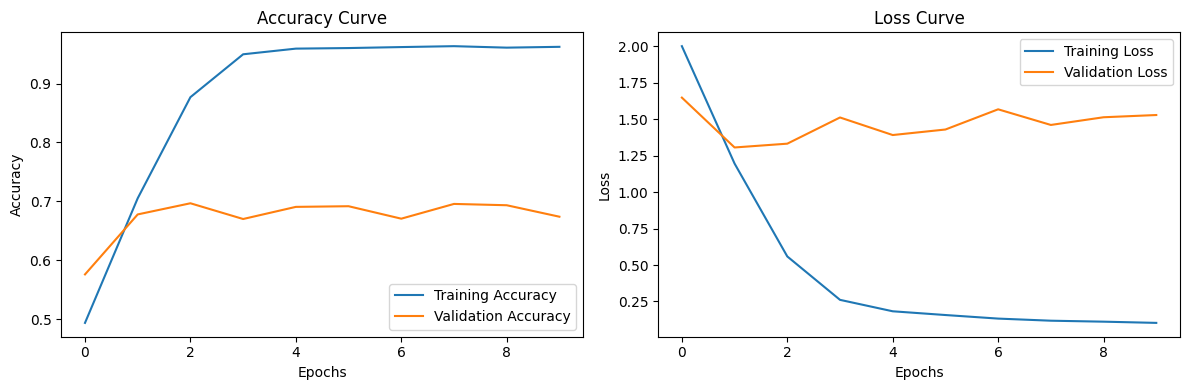


Test Accuracy: 0.6807658076286316
71/71 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step

Inference on Test Samples:

Sample 1: Predicted Class = 3, Actual Class = 3
Sample 2: Predicted Class = 1, Actual Class = 10
Sample 3: Predicted Class = 16, Actual Class = 1
Sample 4: Predicted Class = 3, Actual Class = 4
Sample 5: Predicted Class = 13, Actual Class = 4


In [ ]:
# -----------------------------------------------------------
# Step 1: Import Required Libraries
# -----------------------------------------------------------
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.datasets import reuters
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, Flatten, Dense
from tensorflow.keras.utils import to_categorical

# -----------------------------------------------------------
# Step 2: Load Reuters Dataset
# -----------------------------------------------------------
num_words = 10000
max_len = 200

(X_train, y_train), (X_test, y_test) = reuters.load_data(num_words=num_words)

X_train = pad_sequences(X_train, maxlen=max_len)
X_test = pad_sequences(X_test, maxlen=max_len)

num_classes = np.max(y_train) + 1
y_train = to_categorical(y_train, num_classes)
y_test = to_categorical(y_test, num_classes)

print("Number of classes:", num_classes)

# -----------------------------------------------------------
# Step 3: Build Model
# -----------------------------------------------------------
model = Sequential([
    Embedding(num_words, 128, input_length=max_len),
    Flatten(),
    Dense(128, activation='relu'),
    Dense(64, activation='relu'),
    Dense(num_classes, activation='softmax')
])

model.compile(
    optimizer='adam',
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

#  Build model explicitly so params show correctly
model.build(input_shape=(None, max_len))
model.summary()

# -----------------------------------------------------------
# Step 4: Train Model
# -----------------------------------------------------------
history = model.fit(
    X_train,
    y_train,
    epochs=10,
    batch_size=64,
    validation_split=0.2
)

# -----------------------------------------------------------
# Step 5: Learning Curves
# -----------------------------------------------------------
plt.figure(figsize=(12, 4))

plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title("Accuracy Curve")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title("Loss Curve")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()

plt.tight_layout()
plt.show()

# -----------------------------------------------------------
# Step 6: Evaluation
# -----------------------------------------------------------
test_loss, test_accuracy = model.evaluate(X_test, y_test, verbose=0)
print("\nTest Accuracy:", test_accuracy)

# -----------------------------------------------------------
# Step 7: Inference
# -----------------------------------------------------------
predictions = model.predict(X_test)

print("\nInference on Test Samples:\n")
for i in range(5):
    predicted_class = np.argmax(predictions[i])
    actual_class = np.argmax(y_test[i])
    print(f"Sample {i+1}: Predicted Class = {predicted_class}, Actual Class = {actual_class}")


11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


/usr/local/lib/python3.12/dist-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 26, 26, 32)     │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 13, 13, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 11, 11, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 5, 5, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 1600)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │       204,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 225,034 (879.04 KB)

 Trainable params: 225,034 (879.04 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/5
750/750 ━━━━━━━━━━━━━━━━━━━━ 47s 61ms/step - accuracy: 0.8711 - loss: 0.4321 - val_accuracy: 0.9803 - val_loss: 0.0652
Epoch 2/5
750/750 ━━━━━━━━━━━━━━━━━━━━ 80s 59ms/step - accuracy: 0.9831 - loss: 0.0550 - val_accuracy: 0.9849 - val_loss: 0.0486
Epoch 3/5
750/750 ━━━━━━━━━━━━━━━━━━━━ 44s 58ms/step - accuracy: 0.9882 - loss: 0.0366 - val_accuracy: 0.9872 - val_loss: 0.0442
Epoch 4/5
750/750 ━━━━━━━━━━━━━━━━━━━━ 45s 60ms/step - accuracy: 0.9922 - loss: 0.0254 - val_accuracy: 0.9852 - val_loss: 0.0491
Epoch 5/5
750/750 ━━━━━━━━━━━━━━━━━━━━ 45s 59ms/step - accuracy: 0.9931 - loss: 0.0213 - val_accuracy: 0.9900 - val_loss: 0.0352


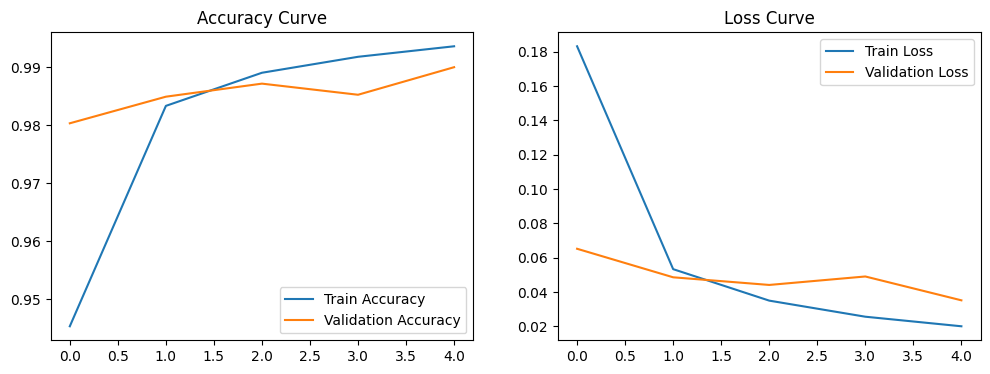

313/313 ━━━━━━━━━━━━━━━━━━━━ 4s 12ms/step - accuracy: 0.9875 - loss: 0.0385

Test Accuracy: 0.9901999831199646
313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 10ms/step
Image 1: Predicted = 7, Actual = 7


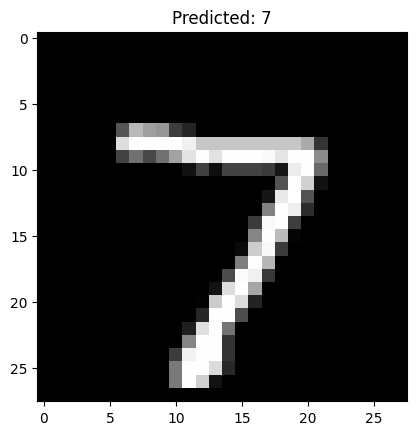

Image 2: Predicted = 2, Actual = 2


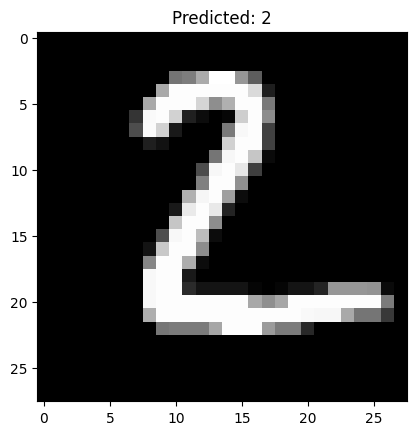

Image 3: Predicted = 1, Actual = 1


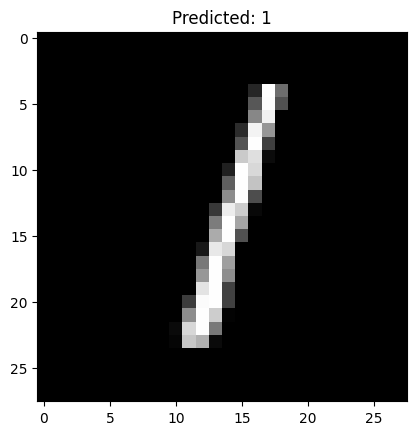

Image 4: Predicted = 0, Actual = 0


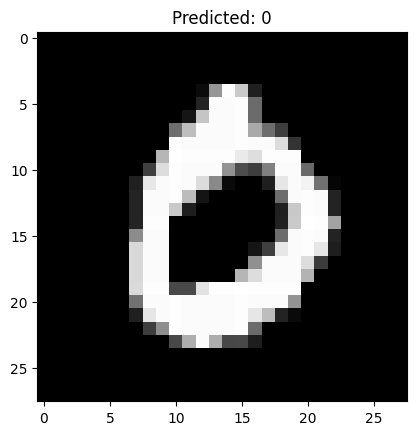

Image 5: Predicted = 4, Actual = 4


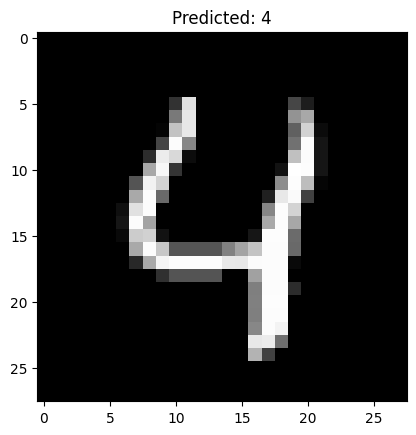

In [4]:
# -----------------------------------------------------------
# Step 1: Import Required Libraries
# -----------------------------------------------------------
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
from tensorflow.keras.utils import to_categorical
# -----------------------------------------------------------
# Step 2: Load MNIST Dataset
# -----------------------------------------------------------
(X_train, y_train), (X_test, y_test) = mnist.load_data()
# Normalize pixel values (0–255 → 0–1)
X_train = X_train / 255.0
X_test = X_test / 255.0
# Reshape for CNN (add channel dimension)
X_train = X_train.reshape(-1, 28, 28, 1)
X_test = X_test.reshape(-1, 28, 28, 1)
# One-hot encode labels
y_train = to_categorical(y_train, 10)
y_test = to_categorical(y_test, 10)
# -----------------------------------------------------------
# Step 3: Build Deep CNN Model
# -----------------------------------------------------------
model = Sequential([
 Conv2D(32, (3,3), activation='relu', input_shape=(28,28,1)),
 MaxPooling2D((2,2)),

 Conv2D(64, (3,3), activation='relu'),
 MaxPooling2D((2,2)),

 Flatten(),
 Dense(128, activation='relu'),
 Dense(10, activation='softmax')
])
# Compile the model
model.compile(
 optimizer='adam',
 loss='categorical_crossentropy',
 metrics=['accuracy']
)
model.summary()
# -----------------------------------------------------------
# Step 4: Train the Model
# -----------------------------------------------------------
history = model.fit(
 X_train, y_train,
 epochs=5,
 batch_size=64,
 validation_split=0.2
)
# -----------------------------------------------------------
# Step 5: Plot Training Progress
# -----------------------------------------------------------
plt.figure(figsize=(12,4))
plt.subplot(1,2,1)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title("Accuracy Curve")
plt.legend()
plt.subplot(1,2,2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title("Loss Curve")
plt.legend()
plt.show()
# -----------------------------------------------------------
# Step 6: Evaluate Model
# -----------------------------------------------------------
test_loss, test_accuracy = model.evaluate(X_test, y_test)
print("\nTest Accuracy:", test_accuracy)
# -----------------------------------------------------------
# Step 7: Inference Example
# -----------------------------------------------------------
predictions = model.predict(X_test)
for i in range(5):
 predicted_digit = np.argmax(predictions[i])
 actual_digit = np.argmax(y_test[i])
 print(f"Image {i+1}: Predicted = {predicted_digit}, Actual = {actual_digit}")
 plt.imshow(X_test[i].reshape(28,28), cmap='gray')
 plt.title(f"Predicted: {predicted_digit}")
 plt.show()
